## Wyner-Ahlswede-Körner Network Demo

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(solver = "pyomo.glpk")     # Set linear programming solver
PsiOpts.setting(repr_latex = True)         # Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)         # LaTeX in diagrams
PsiOpts.setting(proof_note_color = "blue") # Reasons in proofs are blue

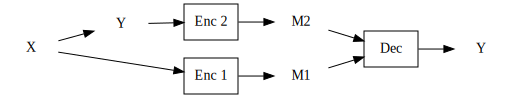

In [2]:
X, Y, U = rv("X, Y, U")
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

model = CodingModel()        # Define WAK network [Wyner 1975], [Ahlswede-Körner 1975]
model.set_rate(M1, R1)       # The rate of M1, M2 are R1, R2 resp.
model.set_rate(M2, R2)
model.add_edge(X, Y)         # X, Y are correlated source
model.add_node(X, M1,
            label = "Enc 1") # Encoder 1 maps X to M1
model.add_node(Y, M2,
            label = "Enc 2") # Encoder 2 maps Y to M2
model.add_node(M1+M2, Y,
            label = "Dec")   # Decoder maps M1,M2 to Y

model.graph()                # Draw diagram

In [3]:
r = model.get_inner()  # Automatic inner bound
r

( ( R2 >= H(Y|A_M1) )
 &( R1 >= I(A_M1&X|Y) )
 &( R1+R2 >= H(Y)+I(A_M1&X|Y) )
 &( markov(A_M1, X, Y) ) ).exists(A_M1)

In [4]:
# Although the above region does not look like the WAK region
# [Wyner 1975], [Ahlswede-Körner 1975], they are actually equivalent.

# Write the WAK region
r_wak = alland([
    R1 >= I(U & X),
    R2 >= H(Y | U),
    markov(U, X, Y)
]).exists(U)
r_wak

( ( R1 >= I(U&X) )
 &( R2 >= H(Y|U) )
 &( markov(U, X, Y) ) ).exists(U)

In [5]:
# Prove r is the same region as r_wak
# Requires a higher level of searching to prove
with PsiOpts(auxsearch_level = 10):
    print(bool(r >> r_wak))
    print(bool(r_wak >> r))

True
True


In [6]:
# Automatic outer bound with 1 auxiliary, coincides with inner bound
model.get_outer(1)

( ( R1 >= I(A&X) )
 &( R2 >= H(Y|A) )
 &( markov(A, X, Y) ) ).exists(A)

In [7]:
bool(model.get_outer() >> r_wak)  # Converse proof

True

In [8]:
# Output converse proof (is_proof = True for shorter proof)
(model.get_outer(is_proof = True) >> r_wak).proof()

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 10.
- A. Wyner, "On source coding with side information at the decoder," IEEE Transactions on Information Theory, vol. 21, no. 3, pp. 294-300, 1975.
- R. Ahlswede and J. Körner, "Source coding with side information and a converse for degraded broadcast channels," IEEE Transactions on Information Theory, vol. 21, no. 6, pp. 629-637, 1975.
